# 数据加载

In [1]:
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load('../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_test = np.load('../dataset/data/test_label_(1613, 2).npy')

train_we.shape, test_we.shape, y_train.shape, y_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

# BiGRU

In [3]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 120, 64)      63936       embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 64)           0   

Train on 32193 samples, validate on 1613 samples
Epoch 1/100
32193/32193 [==============================] - 33s 1ms/step - loss: 0.5006 - acc: 0.8848 - val_loss: 0.7455 - val_acc: 0.6851
Epoch 2/100
32193/32193 [==============================] - 30s 919us/step - loss: 0.1994 - acc: 0.9535 - val_loss: 0.6789 - val_acc: 0.7142
Epoch 3/100
32193/32193 [==============================] - 29s 907us/step - loss: 0.1404 - acc: 0.9672 - val_loss: 0.6813 - val_acc: 0.7285
Epoch 4/100
32193/32193 [==============================] - 29s 906us/step - loss: 0.1129 - acc: 0.9756 - val_loss: 0.8573 - val_acc: 0.6956
Epoch 5/100
32193/32193 [==============================] - 29s 895us/step - loss: 0.0957 - acc: 0.9806 - val_loss: 0.7097 - val_acc: 0.7402
Epoch 6/100
32193/32193 [==============================] - 29s 903us/step - loss: 0.0817 - acc: 0.9856 - val_loss: 0.8559 - val_acc: 0.7210
Epoch 7/100
32193/32193 [==============================] - 29s 902us/step - loss: 0.0710 - acc: 0.9879 - val_loss

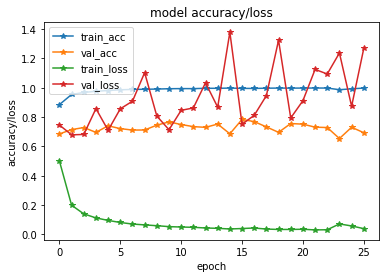

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='BiGRU', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

In [4]:
from train import predict

predict(model, model_file='./model/BiGRU.hdf5', test_data=test_we, test_label=y_test)



TEST_sz: 1613

Accuracy: 0.7836329820210788

              precision    recall  f1-score   support

       truth      0.742     0.934     0.827       891
       rumor      0.880     0.598     0.712       722

   micro avg      0.784     0.784     0.784      1613
   macro avg      0.811     0.766     0.769      1613
weighted avg      0.803     0.784     0.775      1613
 samples avg      0.784     0.784     0.784      1613




array([[0.96468985, 0.03531018],
       [0.9985771 , 0.00142282],
       [0.995261  , 0.00473902],
       ...,
       [0.21726112, 0.78273886],
       [0.3283201 , 0.6716799 ],
       [0.08903226, 0.9109677 ]], dtype=float32)